In [3]:
%pip install pandas

In [4]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install scikit_learn

Note: you may need to restart the kernel to use updated packages.


IMPORTING THE NECESSARY LIBRARIES

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

READING THE CSV FILE INTO THE LOCAL DATAFRAME

In [8]:
data= pd.read_csv("healthcare.csv")
data 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41


HEAD WILL DISPLAY THE FIRST FIVE ROWS

In [9]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


HEAD(20) FUNCTION WILL DISPLAY THE FIRST 20 RECORDS

In [10]:
data.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,False,True,False,False,False,False,True,2
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,False,False,False,False,False,False,False,2
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,False,False,False,False,False,False,False,2
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,False,False,False,False,False,False,True,0
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,False,False,False,False,False,False,True,2


TAIL FUNCTION WILL DISPLAY THE LAST 5 ROWS/RECORDS

In [11]:
data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41
106986,3.775115e+14,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,False,False,False,False,False,True,True,41


TAIL(10) WILL DISPLAY THE LAST 10 RECORDS

In [12]:
data.tail(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
106977,5.574942e+12,5780122,F,2016-06-07,2016-06-07,19,MARIA ORTIZ,False,False,False,False,False,False,True,0
106978,7.263315e+13,5630375,F,2016-04-27,2016-06-07,50,MARIA ORTIZ,False,False,False,False,False,True,True,41
106979,6.542388e+13,5630447,F,2016-04-27,2016-06-07,22,MARIA ORTIZ,False,False,False,False,False,True,True,41
106980,9.969977e+14,5650534,F,2016-05-03,2016-06-07,42,MARIA ORTIZ,False,False,False,False,False,True,True,35
106981,3.635534e+13,5651072,F,2016-05-03,2016-06-07,53,MARIA ORTIZ,False,False,False,False,False,True,True,35
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41
106986,3.775115e+14,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,False,False,False,False,False,True,True,41


SHAPE WILL DISPLAY THE TOTAL NUMBER OF ROWS AND COLUMNS

In [13]:
data.shape

(106987, 15)

COLUMNS WILL DISPLAY ALL THE FEATURE NAME OR COLUMN NAME

In [14]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff'],
      dtype='object')

INFO() WILL SHOW THE TOTAL NUMBER OF COLUMNS WITH THE DATA TYPE AND NOT NULL COUNTS

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB


DTYPE WILL SHOW THE COLUMNS/FEATURES AND ITS DATA TYPES

In [16]:
data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship          bool
Hipertension         bool
Diabetes             bool
Alcoholism           bool
Handcap              bool
SMS_received         bool
Showed_up            bool
Date.diff           int64
dtype: object

DESCRIBE() IS USED TO SHOW THE COLUMNS WITH DATA TYPE OF INTEGER AND FLOAT 

In [17]:
data.describe()

,PatientId,AppointmentID,Age,Date.diff
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,10.166721
std,2.558267e+14,7.133274e+04,22.466214,15.263508
min,3.921784e+04,5.030230e+06,1.000000,-6.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,4.000000
75%,9.433600e+13,5.725634e+06,56.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,179.000000


DESCRIBE().T WILL SHOW THE COLUMNS WITH DATATYPE OF INTEGER AND FLOAT IN TRANSVERSE VIEW

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,106987.0,1.472814e+14,2.558267e+14,3.921784e+04,4.173523e+12,3.172463e+13,9.433600e+13,9.999816e+14
AppointmentID,106987.0,5.675434e+06,7.133274e+04,5.030230e+06,5.640490e+06,5.680744e+06,5.725634e+06,5.790484e+06
Age,106987.0,3.831609e+01,2.246621e+01,1.000000e+00,1.900000e+01,3.800000e+01,5.600000e+01,1.150000e+02
Date.diff,106987.0,1.016672e+01,1.526351e+01,-6.000000e+00,0.000000e+00,4.000000e+00,1.400000e+01,1.790000e+02


THE CODE SHOWS HOW MANY NUMBER OF MISSING VALUES ARE THERE IN EACH ROWS/FEATURES

In [19]:
missing_values=data.isnull().sum()
print(missing_values)


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64


THE CODE SHOWS THE PERCENTAGE OF MISSING VALUES FOR EACH FEATURES

In [20]:
missing_percentage=data.isnull().sum()/data.shape[0]
print(missing_percentage)

PatientId         0.0
AppointmentID     0.0
Gender            0.0
ScheduledDay      0.0
AppointmentDay    0.0
Age               0.0
Neighbourhood     0.0
Scholarship       0.0
Hipertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handcap           0.0
SMS_received      0.0
Showed_up         0.0
Date.diff         0.0
dtype: float64


SHAPE[0] SHOWS THE NUMBER OF ROWS/RECORDS

In [21]:
data.shape[0]

106987

CREATING THE MISSING VALUES AND MISSING PERCENTAGE AS A DATAFRAME(ROWS AND COLUMN)

In [22]:
values={
    'missing values':missing_values,
    'percentage missing%':missing_percentage
}
frame=pd.DataFrame(values)
frame

,missing values,percentage missing%
PatientId,0,0.0
AppointmentID,0,0.0
Gender,0,0.0
ScheduledDay,0,0.0
AppointmentDay,0,0.0
Age,0,0.0
Neighbourhood,0,0.0
Scholarship,0,0.0
Hipertension,0,0.0
Diabetes,0,0.0


CONVERTING THE COLUMNS "SCHEDULED DAY" AND "APPOINMENT DAY" INTO DATE AND TIME FORMAT

In [23]:
data['ScheduledDay']=pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay']=pd.to_datetime(data['AppointmentDay'])


In [24]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff'],
      dtype='object')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       106987 non-null  float64       
 1   AppointmentID   106987 non-null  int64         
 2   Gender          106987 non-null  object        
 3   ScheduledDay    106987 non-null  datetime64[ns]
 4   AppointmentDay  106987 non-null  datetime64[ns]
 5   Age             106987 non-null  int64         
 6   Neighbourhood   106987 non-null  object        
 7   Scholarship     106987 non-null  bool          
 8   Hipertension    106987 non-null  bool          
 9   Diabetes        106987 non-null  bool          
 10  Alcoholism      106987 non-null  bool          
 11  Handcap         106987 non-null  bool          
 12  SMS_received    106987 non-null  bool          
 13  Showed_up       106987 non-null  bool          
 14  Date.diff       106987 non-null  int

FOR CONVERTION PURPOSE FROM(OBJECT OR TEXT OR CATEGORICAL DATA) TO NUMERIC WE CAN USE THE FOLLOWING METHODS:


LabelEncoder()-sklearn


onehotencoder()-sklearn


getdummies()-pd      #more number of columns   


map()

RENAMING THE COLUMN NAMES

In [26]:
data.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
data.rename(columns={'Handcap':'Special Needs'}, inplace=True)
data.rename(columns={'Alcoholism':'Alcholism'}, inplace=True)
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcholism,Special Needs,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41


VISULIZATION OF SHOWING HOW MANY PEOPLE ARE ALCOHOIC IN THE DATASET

C:\Users\jathe\AppData\Local\Temp\ipykernel_19612\2979716570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Alcholism', data=data,palette="RdPu")


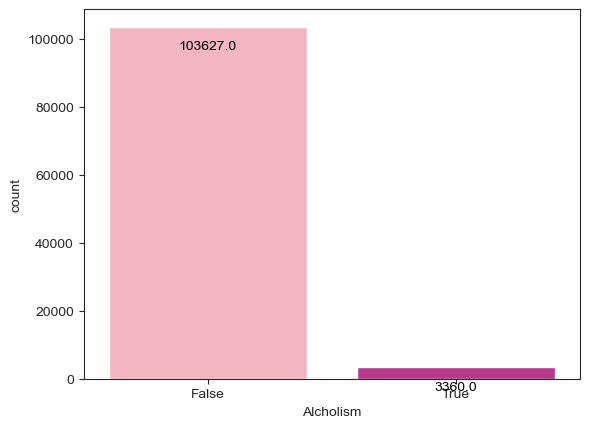

In [27]:
sns.set_style("ticks")
ax=sns.countplot(x='Alcholism', data=data,palette="RdPu")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+p.get_width()/2.,p.get_height()),
                ha='center',va='top',color='black',size=10)  
plt.show()


VISULIZATION OF SHOWING HOW MANY PEOPLE ARE AFFECTED WITH DIABETES IN THE DATASET

C:\Users\jathe\AppData\Local\Temp\ipykernel_19612\3954370889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Diabetes',data=data,palette="PuRd")


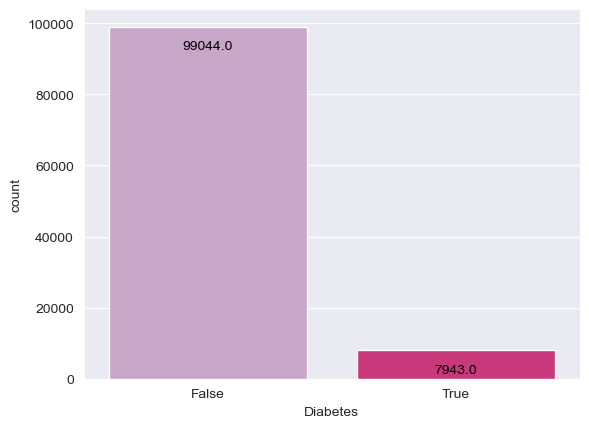

In [28]:
sns.set_style("darkgrid")
ax=sns.countplot(x='Diabetes',data=data,palette="PuRd")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+p.get_width()/2.,p.get_height()),
                ha='center',va='top',color='black',size=10)  
plt.show()


VISULIZATION OF HOW MANY PEOPLE RECEIVED SMS

C:\Users\jathe\AppData\Local\Temp\ipykernel_19612\3383188138.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='SMS_received', data=data,palette="RdBu")


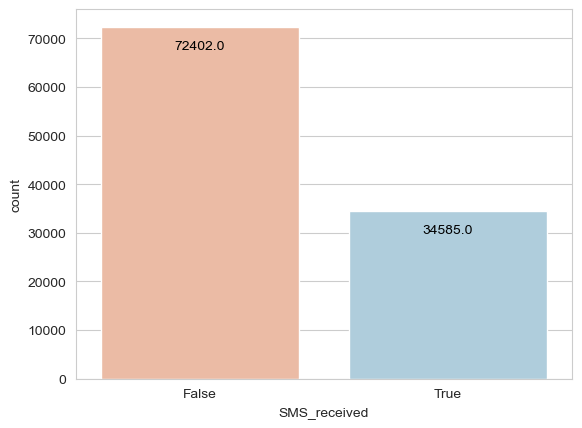

In [29]:
sns.set_style("whitegrid")
ax=sns.countplot(x='SMS_received', data=data,palette="RdBu")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+p.get_width()/2.,p.get_height()),
                ha='center',va='top',color='black',size=10)
    
plt.show()



VISULIZATION OF HOW MANY PEOPLE ARE AFFECTED WITH HYPERTENSION

C:\Users\jathe\AppData\Local\Temp\ipykernel_19612\2837542900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Hypertension', data=data,palette="PuRd")


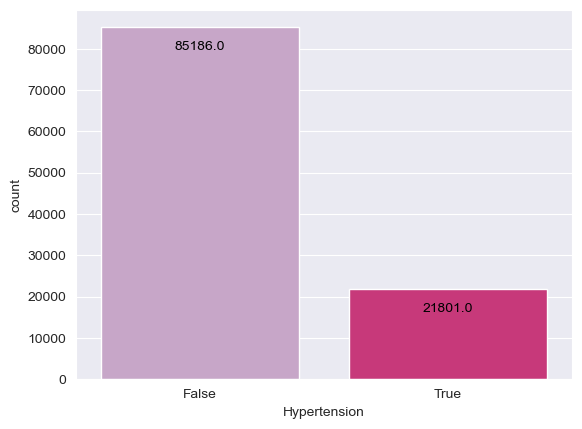

In [30]:
sns.set_style("darkgrid")
ax=sns.countplot(x='Hypertension', data=data,palette="PuRd")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+p.get_width()/2.,p.get_height()),
                ha='center',va='top',color='black',size=10)
    

plt.show()


VISUALIZATION OF HOW MANY PEOPLE WITH AND WITHOUT SCHOLARSHIP HAS SHOWED UP

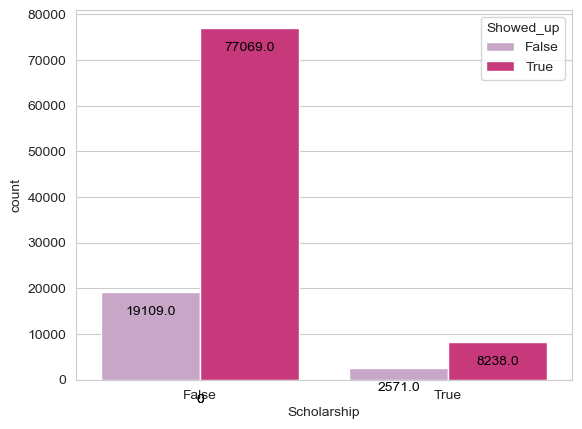

In [31]:
sns.set_style("whitegrid")
ax=sns.countplot(x='Scholarship',hue='Showed_up', data=data,palette="PuRd")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+p.get_width()/2.,p.get_height()),
                ha='center',va='top',color='black',size=10)
plt.show()


VISUALIZATION OF HOW MANY PEOPLE WITH AND WITHOUT HYPERTENSION HAS SHOWED UP

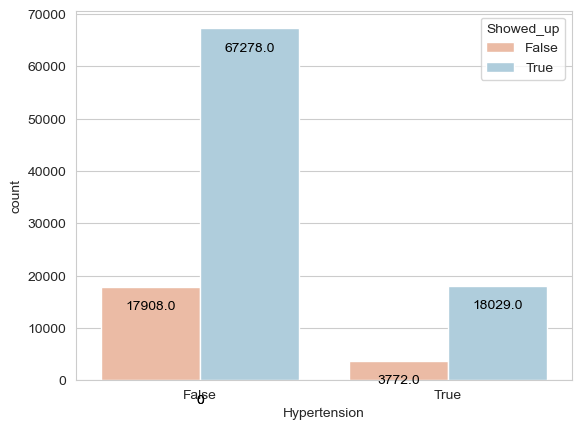

In [32]:
sns.set_style("whitegrid")
ax=sns.countplot(x='Hypertension',hue='Showed_up', data=data, palette="RdBu")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+p.get_width()/2.,p.get_height()),
                ha='center',va='top',color='black',size=10)
plt.show()

In [33]:
data['ScheduledDay']=pd.to_datetime(data['ScheduledDay'])
data['ScheduledDay_DayofWeek']=data['ScheduledDay'].dt.day_of_week
data



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcholism,Special Needs,SMS_received,Showed_up,Date.diff,ScheduledDay_DayofWeek
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0,4
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0,4
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0,4
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0,4
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35,1
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35,1
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41,2
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41,2


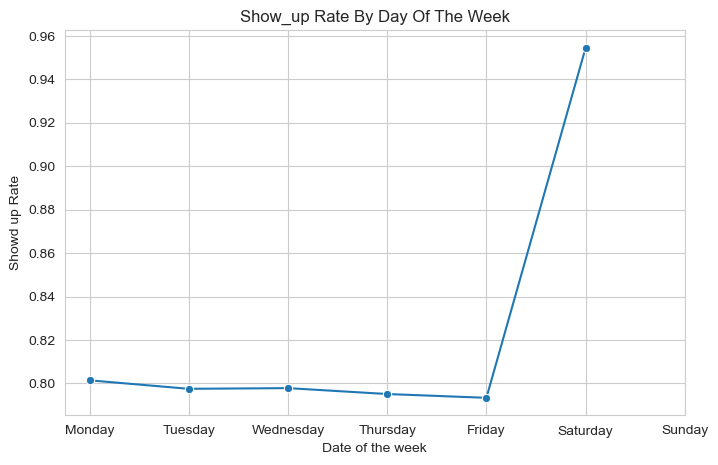

In [34]:
show_rate_by_day=data.groupby('ScheduledDay_DayofWeek')['Showed_up'].mean()
plt.figure(figsize=(8,5))
sns.lineplot(x=show_rate_by_day.index,y=show_rate_by_day.values, marker='o')
plt.title("Show_up Rate By Day Of The Week")
plt.xlabel("Date of the week")
plt.ylabel("Showd up Rate")
plt.xticks(range(7),['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show()

In [35]:
data['AppointmentDay_DayOfWeek']=data['AppointmentDay'].dt.dayofweek
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcholism,Special Needs,SMS_received,Showed_up,Date.diff,ScheduledDay_DayofWeek,AppointmentDay_DayOfWeek
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0,4,4
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0,4,4
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0,4,4
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0,4,4
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35,1,1
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35,1,1
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41,2,1
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41,2,1


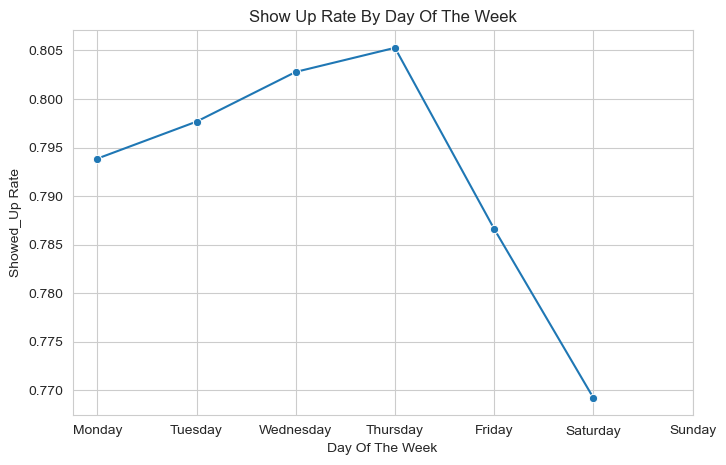

In [36]:
show_rate_by_day=data.groupby('AppointmentDay_DayOfWeek')['Showed_up'].mean()
plt.figure(figsize=(8,5))
sns.lineplot(x=show_rate_by_day.index,y=show_rate_by_day.values,marker='o')
plt.title("Show Up Rate By Day Of The Week")
plt.xlabel("Day Of The Week")
plt.ylabel("Showed_Up Rate")
plt.xticks(range(7),['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show()

In [37]:
e=LabelEncoder()

ENCODING OF ROWS FROM(OBJECT OR TEXT OR CATEGORICAL DATA) TO NUMERIC

In [38]:
data['PatientId']=e.fit_transform(data['PatientId'])
data['AppointmentID']=e.fit_transform(data['AppointmentID'])
data['Gender']=e.fit_transform(data['Gender'])
data['ScheduledDay']=e.fit_transform(data['ScheduledDay'])
data['AppointmentDay']=e.fit_transform(data['AppointmentDay']) 
data['Age']=e.fit_transform(data['Age'])
data['Neighbourhood']=e.fit_transform(data['Neighbourhood']) 
data['Scholarship']=e.fit_transform(data['Scholarship']) 
data['Hypertension']=e.fit_transform(data['Hypertension'])
data['Diabetes']=e.fit_transform(data['Diabetes'])
data['Alcholism']=e.fit_transform(data['Alcholism'])
data['Special Needs']=e.fit_transform(data['Special Needs']) 
data['SMS_received']=e.fit_transform(data['SMS_received'])
data['Showed_up']=e.fit_transform(data['Showed_up'])
data['Date.diff']=e.fit_transform(data['Date.diff'])
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcholism,Special Needs,SMS_received,Showed_up,Date.diff,ScheduledDay_DayofWeek,AppointmentDay_DayOfWeek
0,29835,28249,0,80,0,61,39,0,1,0,0,0,0,1,2,4,4
1,53529,28012,1,80,0,55,39,0,0,0,0,0,0,1,2,4,4
2,15204,28041,0,80,0,61,45,0,0,0,0,0,0,1,2,4,4
3,8714,28216,0,80,0,7,54,0,0,0,0,0,0,1,2,4,4
4,23151,28006,0,80,0,55,39,0,1,1,0,0,0,1,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,12380,33942,0,83,25,55,43,0,0,0,0,0,1,1,37,1,1
106983,14126,32890,0,83,25,50,43,0,0,0,0,0,1,1,37,1,1
106984,26378,21813,0,78,25,20,43,0,0,0,0,0,1,1,43,2,1
106985,44470,21677,0,78,25,37,43,0,0,0,0,0,1,1,43,2,1


In [39]:
data1=data.corr()
data1

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcholism,Special Needs,SMS_received,Showed_up,Date.diff,ScheduledDay_DayofWeek,AppointmentDay_DayOfWeek
PatientId,1.000000,0.004599,0.011988,0.002630,0.004888,-0.001040,0.006785,-0.000283,0.002482,0.006524,0.008035,-0.008087,-0.007284,0.000574,0.001106,0.002047,-0.000285
AppointmentID,0.004599,1.000000,0.019289,0.939817,0.705443,0.001973,0.006550,0.012150,0.018018,0.025509,0.030097,0.017370,-0.242768,0.170938,-0.606304,-0.009789,-0.048016
Gender,0.011988,0.019289,1.000000,0.020662,-0.006452,-0.094096,-0.008752,-0.113679,-0.051312,-0.030027,0.110410,0.024599,-0.045852,0.003238,-0.030766,0.006547,0.004179
ScheduledDay,0.002630,0.939817,0.020662,1.000000,0.612796,-0.022243,0.006557,0.022151,0.013853,0.023274,0.032858,0.015260,-0.256687,0.163972,-0.762665,-0.020716,-0.055610
AppointmentDay,0.004888,0.705443,-0.006452,0.612796,1.000000,0.010174,0.004058,-0.001981,-0.002853,0.000887,0.002627,-0.003192,0.060080,0.019368,0.037108,-0.032252,-0.063246
Age,-0.001040,0.001973,-0.094096,-0.022243,0.010174,1.000000,-0.011654,-0.112700,0.502135,0.290665,0.090404,0.079585,0.005259,0.067057,0.037581,0.007514,0.000545
Neighbourhood,0.006785,0.006550,-0.008752,0.006557,0.004058,-0.011654,1.000000,0.007543,0.006107,0.012501,0.000592,0.010404,0.018917,0.008206,-0.004179,0.017111,0.000763
Scholarship,-0.000283,0.012150,-0.113679,0.022151,-0.001981,-0.112700,0.007543,1.000000,-0.024530,-0.027622,0.033527,-0.010465,-0.000010,-0.029370,-0.030773,-0.005582,-0.000780
Hypertension,0.002482,0.018018,-0.051312,0.013853,-0.002853,0.502135,0.006107,-0.024530,1.000000,0.430827,0.085459,0.082909,-0.008805,0.037280,-0.019822,-0.000669,0.002716
Diabetes,0.006524,0.025509,-0.030027,0.023274,0.000887,0.290665,0.012501,-0.027622,0.430827,1.000000,0.016874,0.057945,-0.016136,0.015928,-0.028478,-0.001156,0.006279


<Axes: >

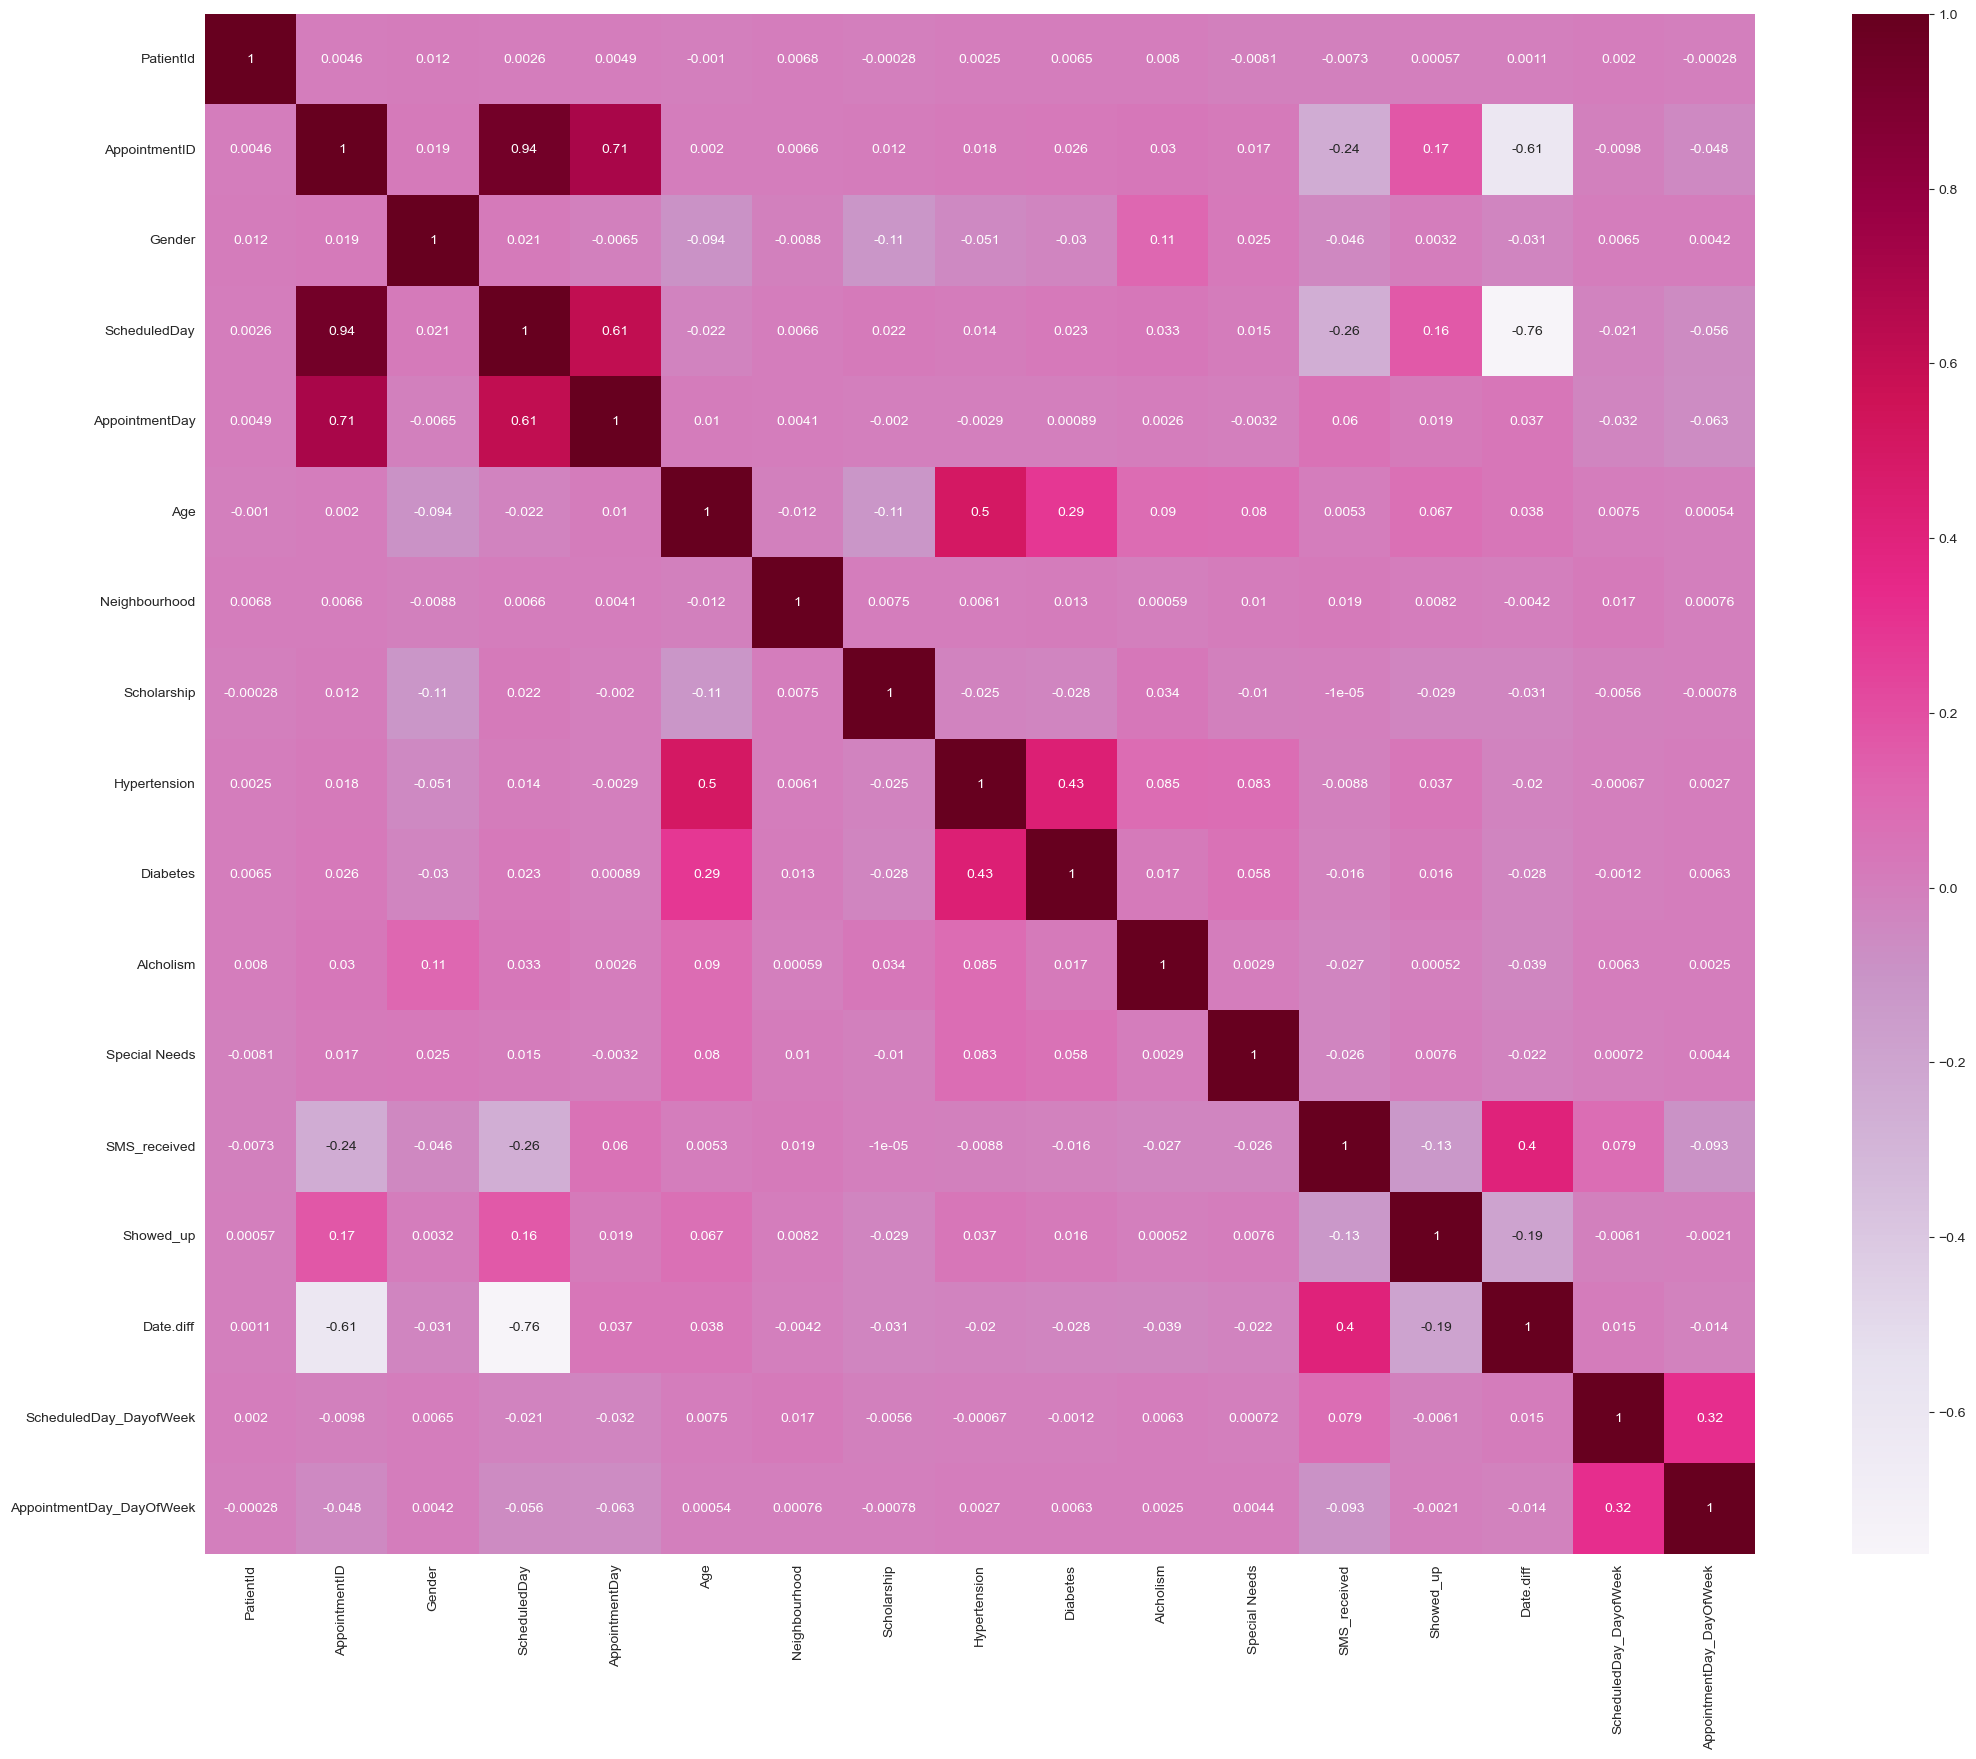

In [40]:
plt.figure(figsize=(25,20))
sns.heatmap(data1, annot=True, cmap="PuRd")

PIE CHART SHOWING THE SHOWED UP RATE IN THE DATA FRAME

Text(0.5, 1.0, 'Showed_up')

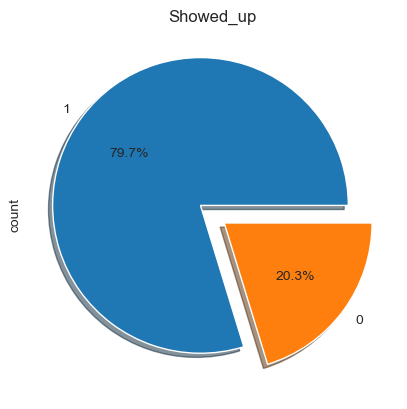

In [41]:
data['Showed_up'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Showed_up')

FEATURE ENGINEERING
DROPING THE COLUMNS WHICH ARE NOT NEEDED

In [99]:
data_new=data.drop(['AppointmentID','PatientId','ScheduledDay_DayofWeek','AppointmentDay_DayOfWeek'],axis=1)
data_new

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcholism,Special Needs,SMS_received,Showed_up,Date.diff
0,0,80,0,61,39,0,1,0,0,0,0,1,2
1,1,80,0,55,39,0,0,0,0,0,0,1,2
2,0,80,0,61,45,0,0,0,0,0,0,1,2
3,0,80,0,7,54,0,0,0,0,0,0,1,2
4,0,80,0,55,39,0,1,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,0,83,25,55,43,0,0,0,0,0,1,1,37
106983,0,83,25,50,43,0,0,0,0,0,1,1,37
106984,0,78,25,20,43,0,0,0,0,0,1,1,43
106985,0,78,25,37,43,0,0,0,0,0,1,1,43


In [100]:
data_new.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcholism', 'Special Needs',
       'SMS_received', 'Showed_up', 'Date.diff'],
      dtype='object')

PIE CHART SHOWING THE SHOWED UP PERCENTAGE

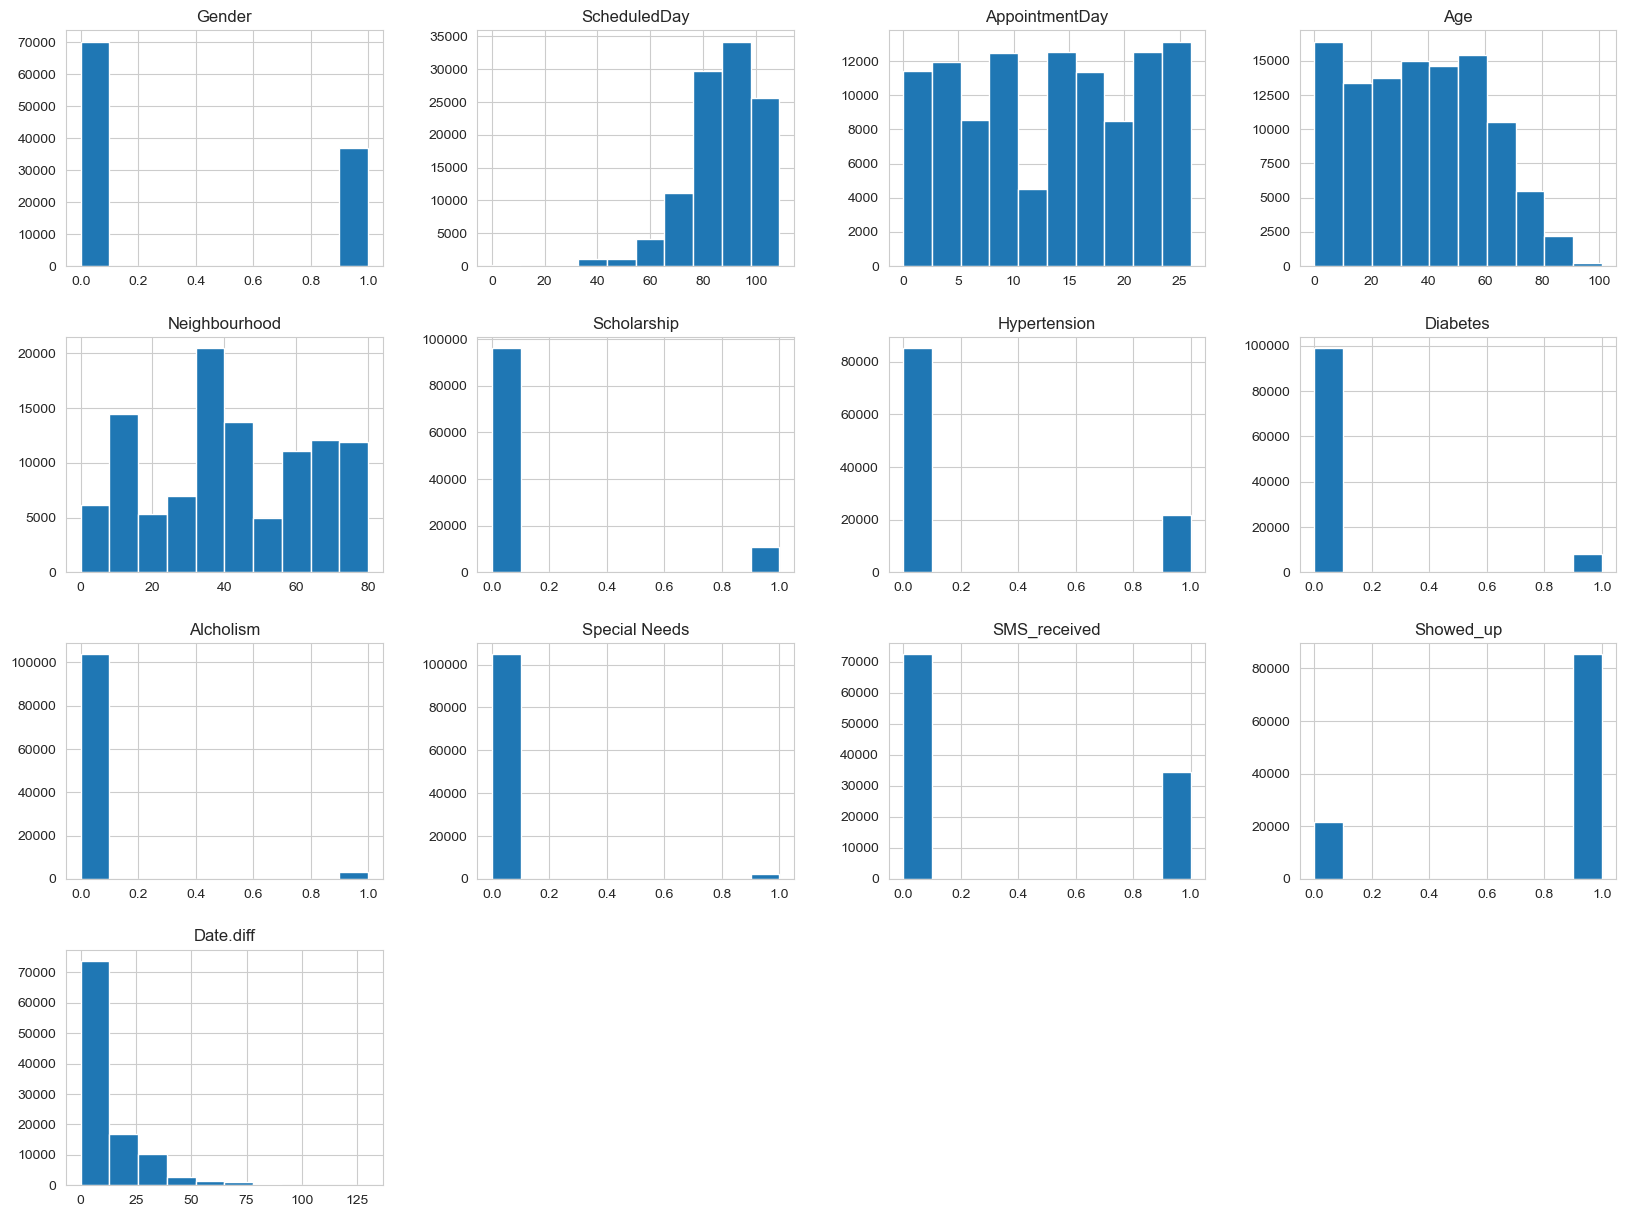

In [101]:
data_new.hist(figsize=(20,15));

In [102]:
data_new

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcholism,Special Needs,SMS_received,Showed_up,Date.diff
0,0,80,0,61,39,0,1,0,0,0,0,1,2
1,1,80,0,55,39,0,0,0,0,0,0,1,2
2,0,80,0,61,45,0,0,0,0,0,0,1,2
3,0,80,0,7,54,0,0,0,0,0,0,1,2
4,0,80,0,55,39,0,1,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,0,83,25,55,43,0,0,0,0,0,1,1,37
106983,0,83,25,50,43,0,0,0,0,0,1,1,37
106984,0,78,25,20,43,0,0,0,0,0,1,1,43
106985,0,78,25,37,43,0,0,0,0,0,1,1,43


In [103]:
x=data_new.drop('Showed_up',axis=1)
y=data_new['Showed_up']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

In [104]:
x_test

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcholism,Special Needs,SMS_received,Date.diff
28700,0,97,18,66,76,0,1,1,0,0,1,8
19039,0,96,16,35,43,0,0,0,0,0,0,4
47774,1,96,14,2,52,0,0,0,0,0,0,2
9094,0,83,2,54,70,0,1,0,0,0,0,2
69876,0,95,13,59,26,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
96546,0,90,26,30,37,0,0,0,0,0,1,30
82689,0,94,24,15,10,0,0,0,0,0,0,23
28176,1,90,15,11,57,0,0,0,0,0,0,10
26917,0,80,3,56,38,0,1,1,0,0,1,7


In [105]:
accuracies = {}
algo_time={}
roc_auc_scores={}

In [106]:
def print_performance2(yt,clf,clf_name):
    y_pred=clf.predict(x_test)
    roc_auc_scores[clf_name]=roc_auc_score(yt,y_pred)*100
    accuracies[clf_name]=clf.score(x_train,y_train)*100
    print('ROC_AUC value :',roc_auc_scores[clf_name],"%",'\n')
    print("\nAccuracy Score :",accuracies[clf_name],"%")
    print('\nClassification Report : ','\n',classification_report(yt,y_pred))
    
    confusionmatrix=confusion_matrix(yt,y_pred)

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionmatrix.shape[0]):
        for j in range(confusionmatrix.shape[1]):
            ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)

LOGISTIC REGRESSION

LOGISTIC REGRESSION


c:\Users\jathe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



ROC_AUC value : 50.34577313736084 % 


Accuracy Score : 79.30925703069319 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.30      0.02      0.03      4301
           1       0.80      0.99      0.89     17097

    accuracy                           0.79     21398
   macro avg       0.55      0.50      0.46     21398
weighted avg       0.70      0.79      0.71     21398



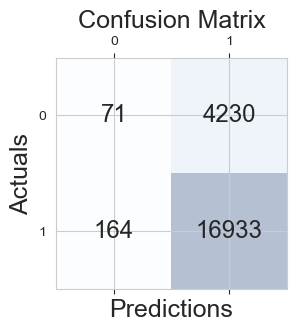

In [107]:
print("LOGISTIC REGRESSION")
start = time.time()
lr = LogisticRegression()
lr.fit(x_train, y_train)
end = time.time()

print_performance2(y_test,lr,'LOGISTIC REGRESSION')
#acc = lr.score(x_train, y_train)*100
#accuracies['LOGISTIC REGRESSION'] = acc
algo_time['LOGISTIC REGRESSION']=end-start

K-NEAREST NEIGHBOURS

In [109]:
start = time.time()
knn = KNeighborsClassifier()
# assigning the dictionary of variables whose optimium value is to be retrieved
param_grid = {'n_neighbors' : np.arange(1,50)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
# training the model with the training data and best parameter
knn_cv.fit(x_train,y_train)
end=time.time()
algo_time['K-NEAREST NEIGHBOURS']=end-start

In [110]:
#finding out the best parameter chosen to train the model
print("The best paramter we have is: {}" .format(knn_cv.best_params_))

# finding out the best score the chosen parameter achieved
print("The best score we have achieved is: {}" .format(knn_cv.best_score_))

The best paramter we have is: {'n_neighbors': 49}
The best score we have achieved is: 0.7955227925811895


K-NEAREST NEIGHBOURS
ROC_AUC value : 51.11310931973596 % 


Accuracy Score : 79.79880592132167 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.46      0.03      0.06      4301
           1       0.80      0.99      0.89     17097

    accuracy                           0.80     21398
   macro avg       0.63      0.51      0.47     21398
weighted avg       0.73      0.80      0.72     21398



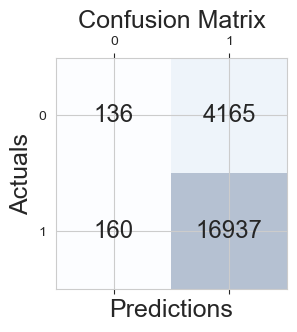

In [111]:
print("K-NEAREST NEIGHBOURS")
print_performance2(y_test,knn_cv,'K-NEAREST NEIGHBOURS')
#acc = knn_cv.score(x_train, y_train)*100
#accuracies['K-NEAREST NEIGHBOURS'] = acc

RANDOM FOREST

In [112]:
rf_start=time.time()
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
rf_end=time.time()
algo_time['RANDOM FOREST TREE']=rf_end-rf_start

c:\Users\jathe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jathe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jathe\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\jathe\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jathe\anaconda3\Lib\site-packa

In [113]:
# finding out the best parameter chosen to train the model
print("The best paramter we have is: {}" .format(CV_rfc.best_params_))

# finding out the best score the chosen parameter achieved
print("The best score we have achieved is: {}" .format(CV_rfc.best_score_*100))

The best paramter we have is: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}
The best score we have achieved is: 79.70183094087623


RANDOM FOREST TREE
ROC_AUC value : 50.02902663097009 % 


Accuracy Score : 79.72753508044258 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.60      0.00      0.00      4301
           1       0.80      1.00      0.89     17097

    accuracy                           0.80     21398
   macro avg       0.70      0.50      0.44     21398
weighted avg       0.76      0.80      0.71     21398



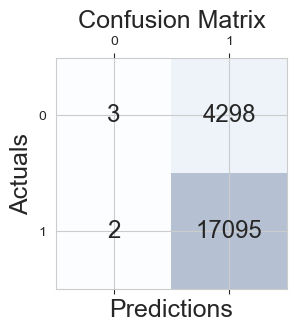

In [114]:
print("RANDOM FOREST TREE")
print_performance2(y_test,CV_rfc,'RANDOM FOREST TREE')
#acc = CV_rfc.score(x_train, y_train)*100
#accuracies['RANDOM FOREST TREE'] = acc

DECISION TREE CLASSIFIER

DECISION TREE CLASSIFIER
ROC_AUC value : 58.69294051038594 % 


Accuracy Score : 99.28261809344659 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.33      0.36      0.34      4301
           1       0.83      0.81      0.82     17097

    accuracy                           0.72     21398
   macro avg       0.58      0.59      0.58     21398
weighted avg       0.73      0.72      0.73     21398



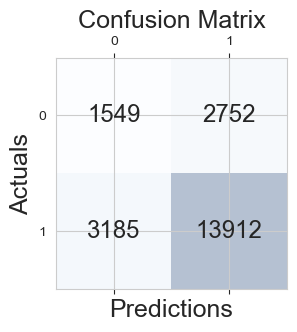

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix)

print("DECISION TREE CLASSIFIER")
start = time.time()
tree = DecisionTreeClassifier(random_state=24)
# training the model with the training data and best parameter
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
end=time.time()
#create the confusion matrix
print_performance2(y_test,tree,'Decision tree')
algo_time['Decision tree']=end-start



ACCURACY COMPARISION

In [116]:
import plotly.express as px
fig = px.bar(x=list(accuracies.keys()), y=list(accuracies.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Accuracy Comparision", xaxis_title="Model", yaxis_title="Accuracy")
fig.show()

ALGORITHMIC TIME COMPARISION

In [117]:
fig = px.bar(x=list(algo_time.keys()), y=list(algo_time.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Algorithm Time Comparision", xaxis_title="Model", yaxis_title="")
fig.show()

ROC Score

In [118]:
fig = px.bar(x=list(roc_auc_scores.keys()), y=list(roc_auc_scores.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="ROC Score Comparision", xaxis_title="Model", yaxis_title="ROC Scores")
fig.show()

In [126]:
data_new.head(10)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcholism,Special Needs,SMS_received,Showed_up,Date.diff
0,0,80,0,61,39,0,1,0,0,0,0,1,2
1,1,80,0,55,39,0,0,0,0,0,0,1,2
2,0,80,0,61,45,0,0,0,0,0,0,1,2
3,0,80,0,7,54,0,0,0,0,0,0,1,2
4,0,80,0,55,39,0,1,1,0,0,0,1,2
5,0,78,0,75,58,0,1,0,0,0,0,1,4
6,0,78,0,22,25,0,0,0,0,0,0,0,4
7,0,78,0,38,25,0,0,0,0,0,0,0,4
8,0,80,0,20,1,0,0,0,0,0,0,1,2
9,0,78,0,18,12,0,0,0,0,0,0,1,4


In [ ]:
data_new.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcholism', 'Special Needs',
       'SMS_received', 'Showed_up', 'Date.diff'],
      dtype='object')

OUTPUT

In [132]:
import colorama
from colorama import Fore

print("SHOWED UP BASED ON ML ALGORITHMS")
print("Enter 1 for Yes and 0 for No")
Gender = int(input("What is the gender of the patient (type 0 for Female and 1 ScheduledDfor Male)  ? "))
ScheduledDay = int(input("What is the Scheduled day for the appoinment  ? "))
AppointmentDay= int(input("What is the Appoinment day for the appoinment  ? "))
Age = int(input("Enter the patient age ? "))
Neighbourhood=int(input("Enter the Neighbourhood ? "))
Scholarship = int(input("Does the patient have Scholarship? ")) 
Hypertension = int(input("Does the patient have Hypertension ? ")) 
Diabetes = int(input("Is the patient have Diabetes ? "))
Alcholism = int(input("Does the patient have any record of Alcoholism? "))
Special_Needs = int(input("Does the patient need any special needs ? "))
SMS_received= int(input("Does the patient received SMS ? ")) 
Date_diff= int(input("Enter the date diffrence "))

patient = [[Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship, Hypertension, Diabetes, Alcholism, Special_Needs,
       SMS_received,Date_diff]]
result = tree.predict(patient)
print("\nResults : ",result)

if result == 1:
    print(Fore.GREEN + 'Patient have showed up for appointment')
    print()
else :
    print(Fore.RED + 'Patient doesnt showed up for appointment')
    print()

SHOWED UP BASED ON ML ALGORITHMS
Enter 1 for Yes and 0 for No

Results :  [1]
Patient have showed up for appointment



c:\Users\jathe\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [133]:
import joblib
#Save as a pickle file
filename='final_model.pkl'
joblib.dump(knn,open(filename,'wb'))
# wb - write binary

In [134]:
pip install -requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'equirements.txt'


In [135]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
